In [4]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [5]:
nyc = pd.read_csv('data.csv')
nyc

,Date,Value,Anomaly
0,189501,29.5,-2.6
1,189601,29.0,-3.1
2,189701,29.9,-2.2
3,189801,34.4,2.3
4,189901,30.4,-1.7
...,...,...,...
119,201401,28.7,-3.4
120,201501,30.0,-2.1
121,201601,34.5,2.4
122,201701,38.1,6.0


In [6]:
nyc.columns = ['Date', 'Fahrenheit', 'Anomaly']
nyc.drop('Anomaly', axis=1, inplace=True)
nyc.head()

,Date,Fahrenheit
0,189501,29.5
1,189601,29.0
2,189701,29.9
3,189801,34.4
4,189901,30.4


In [7]:
nyc.Date.dtype

dtype('int64')

In [8]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Fahrenheit
0,1895,29.5
1,1896,29.0
2,1897,29.9
3,1898,34.4
4,1899,30.4


In [9]:
pd.set_option('precision', 2)
nyc.Fahrenheit.describe()

count    124.00
mean      32.07
std        4.46
min       21.40
25%       29.23
50%       31.85
75%       35.02
max       43.10
Name: Fahrenheit, dtype: float64

In [10]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Fahrenheit)
print(linear_regression.slope, linear_regression.intercept)

0.01568088119590873 1.386484972462629


In [11]:
for i in range(2019, 2023):
    print(f'Jan {i} - {round(linear_regression.intercept + linear_regression.slope * i, 2)} °F')

Jan 2019 - 33.05 °F
Jan 2020 - 33.06 °F
Jan 2021 - 33.08 °F
Jan 2022 - 33.09 °F


In [12]:
for i in range(1891, 1895):
    print(f'Jan {i} - {round(linear_regression.intercept + linear_regression.slope * i, 2)} °F')

Jan 1891 - 31.04 °F
Jan 1892 - 31.05 °F
Jan 1893 - 31.07 °F
Jan 1894 - 31.09 °F


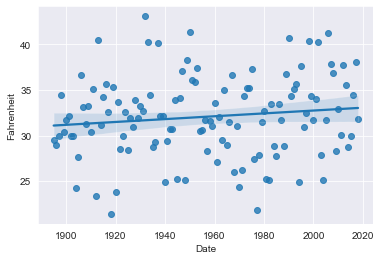

In [13]:
sns.set_style('darkgrid')
axes = sns.regplot(x='Date', y='Fahrenheit', data=nyc)

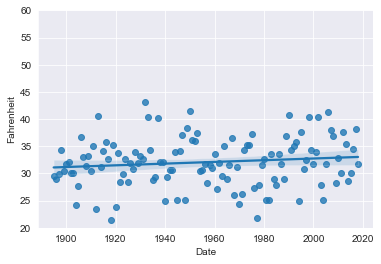

In [14]:
axes.set_ylim(20, 60)
axes.get_figure()

In [15]:
nyc['Celsius'] = pd.Series(map(lambda f: 5 / 9 * (f - 32), nyc.Fahrenheit), dtype=float)
nyc.head()

,Date,Fahrenheit,Celsius
0,1895,29.5,-1.39
1,1896,29.0,-1.67
2,1897,29.9,-1.17
3,1898,34.4,1.33
4,1899,30.4,-0.89


In [16]:
nyc.Celsius.describe()

count    124.00
mean       0.04
std        2.48
min       -5.89
25%       -1.54
50%       -0.08
75%        1.68
max        6.17
Name: Celsius, dtype: float64